In [1]:
##### Import Libraries , Librosa - For Audio Analysis
import librosa 
import librosa.display
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
##### Change Directory to Folder Which Contains 24 Folders, each corresponding to an actor. 
import os
os.chdir("D:/DSPPRojectfiles/RAVDESS/Audio_Speech_Actors_01-24")

In [3]:
#####Plotting Functions for Waveform, Spectrogram and Mel-Spectrogram
def plotwave(signal):
    plt.plot(signal)
    plt.xticks(np.linspace(0,66150,7),[0,.5,1,1.5,2,2.5,3])
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

def plotspecgram(signal,sample_rate=22050):
    plt.specgram(signal,Fs=sample_rate)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    
def plotmelspec(signal,sample_rate=22050):
    librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(signal,sample_rate,power=2,fmax=3000),
                                             ref=np.max),x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.xlabel("Time")
    plt.ylabel("Frequency")    
    plt.tight_layout()

In [4]:
os.getcwd()

'D:\\DSPPRojectfiles\\RAVDESS\\Audio_Speech_Actors_01-24'

In [5]:
###### Audio File Naming Convention Encodings
emotion = {'01':"Neutral","02":"Calm","03":"Happy","04":"Sad","05":"Angry","06":"Fearful","07":"Disgust","08":"Surprised"}
intensity = {'01':"Normal",'02':"Strong"}
statement = {'01':"Kids are talking by the door",'02':"Dogs are sitting by the door"}
repitition = {'01':"First",'02':"Second"}

sample_rate=22050

In [6]:
##### Loading the Audio Files
audiolist = list()
metadatalist = list()

for folder in os.listdir():
    os.chdir(folder)
    files = os.listdir()
    for file in files:
        codes = file.replace(".wav","").split("-")
        voice_clip,sample_rate = librosa.load(file,res_type="kaiser_fast",duration=3)
        audiolist.append(voice_clip)
        metadatalist.append([file,codes[2],emotion[codes[2]],intensity[codes[3]],statement[codes[4]],repitition[codes[5]],codes[6]])
    os.chdir("..")    

In [7]:
metadf = pd.DataFrame(metadatalist,columns=["filename","label","emotion","intensity","sentence","rep","actor"])
metadf.head()

,filename,label,emotion,intensity,sentence,rep,actor
0,03-01-01-01-01-01-01.wav,01,Neutral,Normal,Kids are talking by the door,First,01
1,03-01-01-01-01-02-01.wav,01,Neutral,Normal,Kids are talking by the door,Second,01
2,03-01-01-01-02-01-01.wav,01,Neutral,Normal,Dogs are sitting by the door,First,01
3,03-01-01-01-02-02-01.wav,01,Neutral,Normal,Dogs are sitting by the door,Second,01
4,03-01-02-01-01-01-01.wav,02,Calm,Normal,Kids are talking by the door,First,01


In [8]:
fulldf = pd.concat([metadf,pd.Series(audiolist)],axis=1)
fulldf.rename(columns={0:"audio"},inplace=True)

In [9]:
fulldf["label"]=pd.to_numeric(fulldf["label"])-1

In [10]:
fulldf["label"].value_counts() 

6    192
5    192
4    192
3    192
2    192
7    191
1    191
0     96
Name: label, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


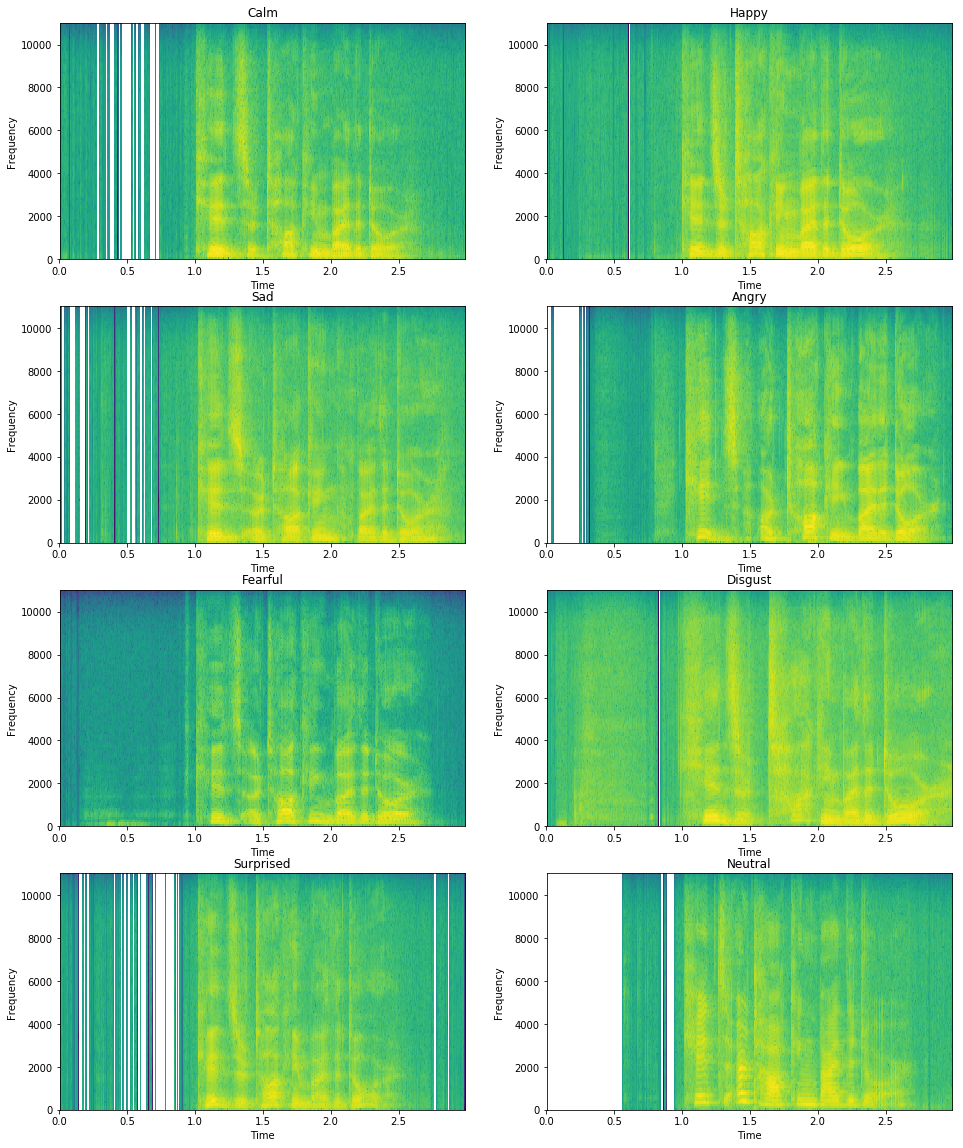

In [11]:
##### Spectrogram of all 8 emotions
arr = [4,12,20,28,36,44,52,60]

plt.figure(figsize=(16,20))

for i in range(1,9):
    plt.subplot(4,2,i)
    plotspecgram(fulldf["audio"][arr[i-1]])
    plt.title(fulldf["emotion"][arr[i-1]])
    
plt.savefig("D:/DSPPRojectfiles/specgram.pdf")    

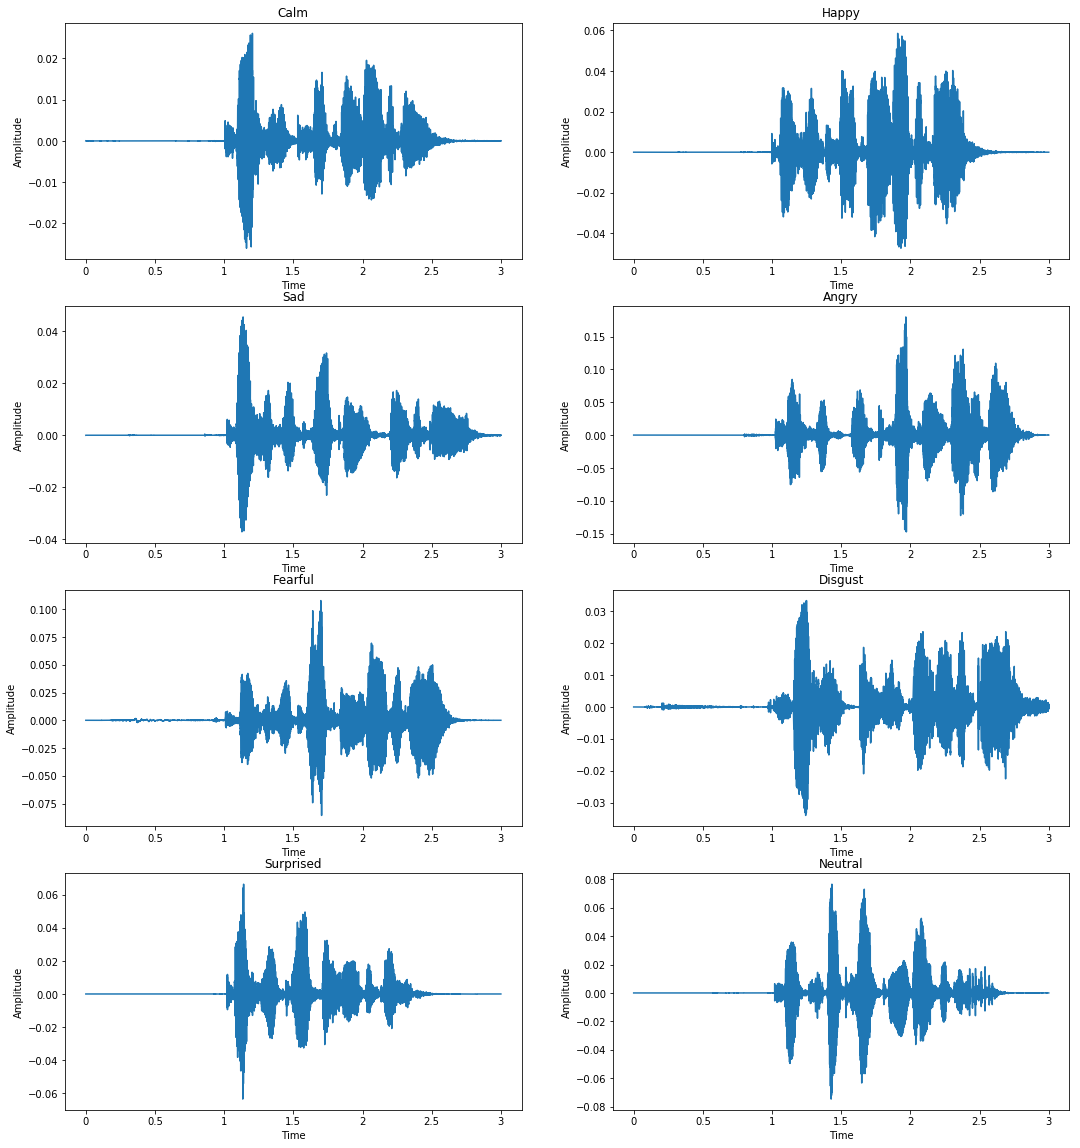

In [12]:
##### Waveforms of all 8 emotions
plt.figure(figsize=(18,20))

for i in range(1,9):
    plt.subplot(4,2,i)
    plotwave(fulldf["audio"][arr[i-1]])
    plt.title(fulldf["emotion"][arr[i-1]])

plt.savefig("D:/DSPPRojectfiles/waveform.png") 

In [ ]:
#####
plt.figure(figsize=(18,20))

for i in range(1,9):
    plt.subplot(4,2,i)
    plotmelspec(fulldf["audio"][arr[i-1]])
    plt.title(fulldf["emotion"][arr[i-1]])

plt.savefig("D:/DSPPRojectfiles/melpowerspec.png") 

In [ ]:
np.mean(librosa.power_to_db(librosa.feature.melspectrogram(fulldf["audio"][0],sample_rate,power=2,fmax=3000),ref=np.max),axis=1)

In [ ]:
signal = fulldf["audio"][0]
melspec = librosa.power_to_db(librosa.feature.melspectrogram(signal,sample_rate,power=2,fmax=3000),ref=np.max)

In [ ]:
melspec.shape

In [ ]:
plt.imshow(melspec)

In [14]:
## List of melspec of each  audio signal
mellistimage = list(map(lambda x: librosa.power_to_db(librosa.feature.melspectrogram(x,sample_rate,power=2,fmax=3000),ref=np.max),fulldf["audio"]))

In [15]:
len(mellistimage)

1438

In [16]:
mellistimage[0]    
img = ((img.flatten() - np.mean(img)) / np.std(img)).reshape(128,130)


NameError: name 'img' is not defined

In [17]:
normimage = list(map(lambda img: ((img.flatten() - np.mean(img)) / np.std(img)).reshape(128,130),mellistimage))

In [18]:
melimgarray = [np.array(l).reshape(128,130,1) for l in normimage]


In [19]:
mel3darray = np.dstack(melimgarray)
mel3darray = mel3darray.reshape(1438,128,130,1)

In [20]:
mel3darray.shape

(1438, 128, 130, 1)

In [22]:
#Shuffling Indices, Train-Test Splitting.
np.random.seed(42)

X_train = mel3darray[0:1198,:,:]
shuffle = np.random.randint(0,len(X_train),len(X_train))

X_train = X_train[shuffle,:,:]

X_test = mel3darray[1198:1439,:,:]

y_train = fulldf["label"][0:1198]
y_train = y_train[shuffle]

y_test = fulldf["label"][1198:1439]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1198, 128, 130, 1) (240, 128, 130, 1) (1198,) (240,)


In [23]:
y_train.unique()

array([6, 3, 7, 2, 0, 4, 1, 5], dtype=int64)

In [29]:
fulldf.iloc[655]

filename                              03-01-08-02-01-01-11.wav
label                                                        7
emotion                                              Surprised
intensity                                               Strong
sentence                          Kids are talking by the door
rep                                                      First
actor                                                       11
audio        [-8.718604e-05, -0.00014747362, -0.00011272166...
Name: 655, dtype: object

In [ ]:
desired_indices = [i for i in len(df.index) if i not in unwanted_indices]
desired_df = df.iloc[desired_indices]

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,8)
y_cat_test = to_categorical(y_test,8)

In [ ]:
y_train.shape

In [ ]:
y_cat_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,ZeroPadding2D,Convolution2D,Dropout
from keras.optimizers import SGD,RMSprop
from keras import backend as K

In [ ]:
K.clear_session()

In [ ]:
#create model
model = Sequential()

# #add model layers
model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(128,130,1)))
#model.add(Conv2D(128, kernel_size=3, activation="relu"))
#model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8, activation="softmax"))


# model.add(ZeroPadding2D((1,1),input_shape=(128,130,1)))
# model.add(Convolution2D(64, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))


# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
opt = RMSprop(lr=0.00001, decay=1e-6)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), epochs=10,batch_size=32)

In [ ]:
preds = [np.argmax(pred) for pred in model.predict(X_test)]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confmat = confusion_matrix(y_test,preds)

In [ ]:
(sum(confmat.diagonal())/ 240 ) * 100


In [ ]:
1199+239

In [ ]:
mellist = list(map(lambda x: np.mean(librosa.power_to_db(librosa.feature.melspectrogram(x,sample_rate,power=2,fmax=3000),ref=np.max),axis=1),audiolist))

In [ ]:
meldf = pd.DataFrame(mellist)
meldf = pd.concat([meldf,metadf["emotion"]],axis=1)
meldf.head()

In [ ]:
meldf.shape

In [ ]:
from sklearn.utils import shuffle
meldf = shuffle(meldf)


dat_train = meldf[0:1198][:] 
dat_train = dat_train.iloc[np.random.randint(0,len(dat_train),len(dat_train)),:]
dat_test = meldf[1198:1439][:]
dat_test = dat_test.iloc[np.random.randint(0,len(dat_test),len(dat_test)),:]

In [ ]:
meldf.head()

In [ ]:
X_train = dat_train.iloc[:,0:128]
X_test = dat_test.iloc[:,0:128]

In [ ]:
y_train = dat_train.iloc[:,128]
y_test = dat_test.iloc[:,128]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,max_depth=7).fit(X_train,y_train)
testpreds = model.predict(X_test)
trainpreds = model.predict(X_train)


In [ ]:
mat = confusion_matrix(y_train,trainpreds)
mat

In [ ]:
(sum(mat.diagonal()) / mat.sum())*100

In [ ]:
mat = confusion_matrix(y_test,testpreds)
mat

In [30]:
(sum(mat.diagonal()) / mat.sum())*100

NameError: name 'mat' is not defined

In [ ]:
li